All palettes displayed: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f (open in incognito)

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
cars = sns.load_dataset('mpg')

In [49]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [50]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [51]:
cars.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [52]:
cars.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [53]:
cars.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [54]:
cars = cars[cars.cylinders.isin([8, 6, 4])]

In [55]:
hp = cars.horsepower
mpg = cars.mpg
cyl = cars.cylinders
org = cars.origin

# cars.model_year.describe()
cars['newer'] = cars.model_year>75
newer = cars.newer

Typing color='blue' will use blue from matplotlib, if we want to use seaborn's blue we have to extract it from a palette and save it in a variable

In [56]:
color = sns.color_palette('Paired')
color

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [57]:
# sns.set_style('darkgrid')
sns.set_style('whitegrid')



# sns.set_style('white')
# plt.rc('xtick', labelsize=14)
# plt.rc('ytick', labelsize=14)
# plt.rc('date.autoformatter', day='%b %Y')

## Histplot

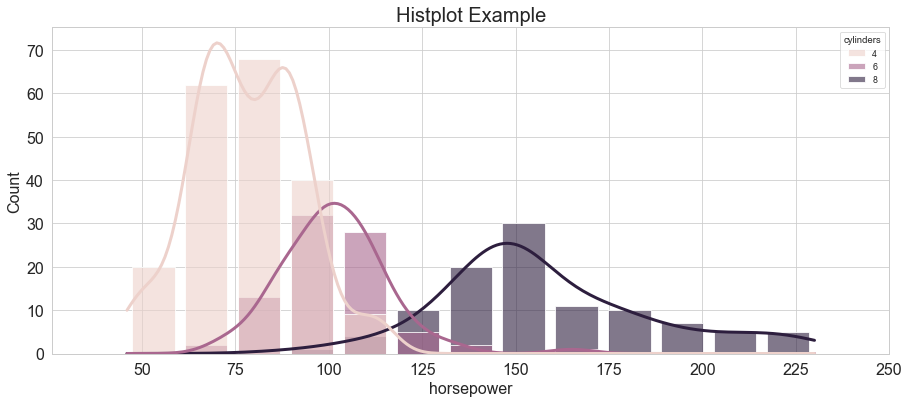

In [58]:
plt.figure(figsize=(15,6))

# sns.displot(kind="hist") == sns.histplot

p = sns.histplot(x=hp,
                 
                 # y=mpg,
                 # cbar=True, cbar_kws=dict(shrink=.9),  # show values correlated with colors
                 
                 hue=cyl,
                 legend=True,  # hue legend
                 
                 # stat='density','count', 'percent', # y axis
                 # log_scale=True,
                 
                 # element='poly','step', 'bars'
                 # fill=False 
                 # discrete=True, #  (True, True) for x and y,  # for discrete integer data
                 # multiple='stack', 'dodge', 'layer', 'fll',  # what to do with multiple values in the same bin
    
                 alpha=0.6,
                 shrink=.8,
                 
                 # bins=10, 
                 # binwidth=10,
                
                 kde=True, line_kws=dict(linewidth=3), kde_kws=dict(bw_adjust=1),
                 
                 # cumulative=True,  # cumulate values as bins increase
                 
            )

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
plt.xlim(hp.min()-20, hp.max()+20)
p.set_title("Histplot Example")
plt.yticklabels=[]
# plt.tight_layout()

## Kde plot

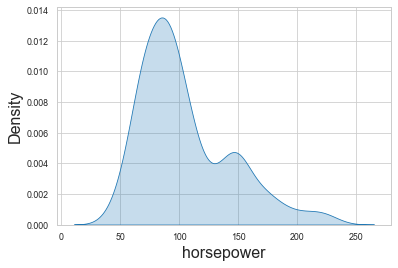

In [59]:
sns.kdeplot(x=hp,
            shade=True,
            bw_adjust=1,  # increasing variance, bigger value = smoother curves
            #cumulative=True,  # use cumulative function
           )

plt.xlim(hp.min()-50, hp.max()+50)
plt.yticklabels=[]

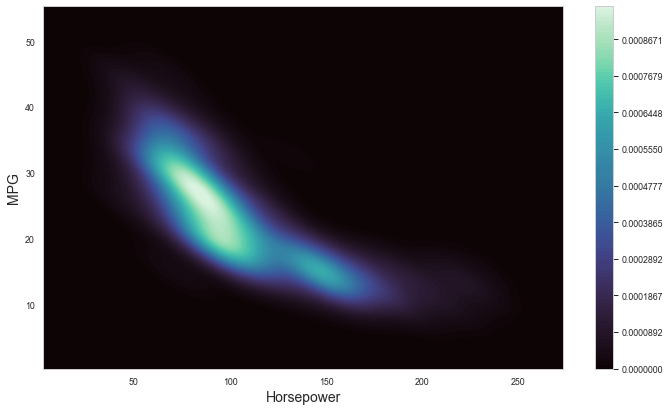

In [60]:
plt.figure(figsize=(10,6))

# combine two plots to see samples
# sns.scatterplot(x=hp, y=mpg, color='white', alpha=1, s=10, zorder=2)

sns.kdeplot(x=hp, y=mpg,
            
            levels=100,  # no lines
            
            fill=True,  # fill space between lines
            thresh=0.00, #0.05  # treshold for filling the space 0.00 fills all space
            
            cbar=True,
            cmap='mako'
           )

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout()

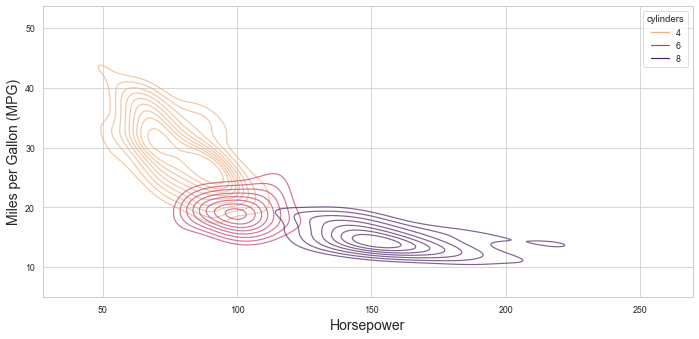

In [61]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=hp, y=mpg, 
            hue=cyl,
            # fill=True,
            thresh=0.2, 
            alpha=0.7,
            # cbar=True,
            palette='flare',
           )

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)
plt.tight_layout()

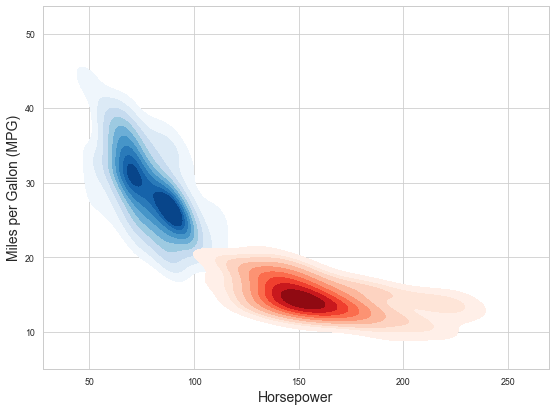

In [62]:
cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
            cmap='Blues', shade=True, thresh=0.1)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
            cmap='Reds', shade=True, thresh=0.1)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)
plt.tight_layout()

## Boxplot

In [63]:
cars.mpg.describe()

count    391.000000
mean      23.515345
std        7.847549
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

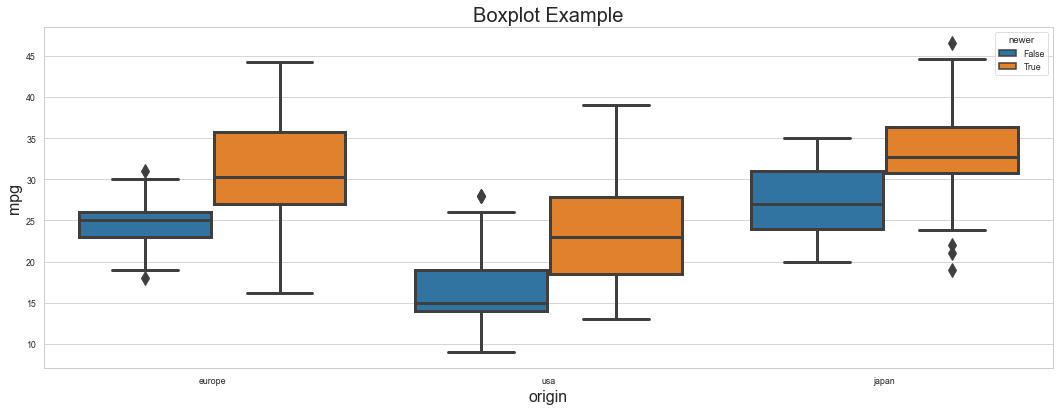

In [64]:
plt.figure(figsize=(15,6))
# sns.swarmplot(x=org, y=mpg, color=".25", order=['europe', 'usa', 'japan'])

p = sns.boxplot(
                x=org, y=mpg, 
                # x=mpg,
                hue=newer, # cyl,
                # dodge=False,  # when using hue, shift boxes so they are not on top of each other

                order=['europe', 'usa', 'japan'], 
                # hue_order=['False', 'True']  # list of string
    
                # width=0.5,  # box size
                linewidth=3,  # box line width
                # whis=1,  # interquartile range multiplier
    
                fliersize=10,  # outlier mark size
                # palette=,
               )



sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
p.set_title("Boxplot Example")
plt.tight_layout()

## Violin plot

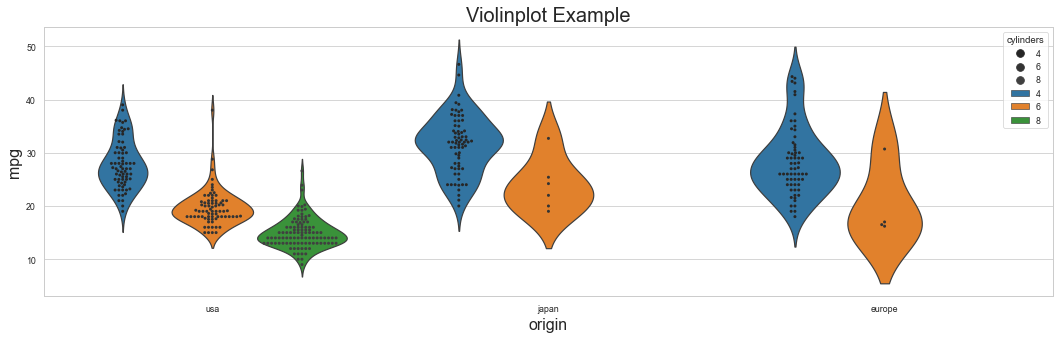

In [65]:
plt.figure(figsize=(15,5))
sns.swarmplot(x=org, y=mpg, color=".25", size=3, hue=cyl, dodge=True)

p = sns.violinplot(x=org, y=mpg,
                   hue=cyl,
               
                   # bw=0.5,  # variance
                   inner=None#'stick' #'quartiles', 'box', 'point', 'stick'  # show inside figure

                   # scale='width', # 'count', 'area',
                   # linewidth=2,
                   # scale_hue=False,

                   # split=True,  # split requires exactly 2 hue values
                   # x='origin', y='mpg', hue='cylinders',
                   # data=cars[cars.cylinders.isin([4, 6])],
                  )

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
p.set_title("Violinplot Example")
plt.tight_layout()

## Swarmplot & Stripplot

Swarmplot ans stripplot are very similar. In swarmplot, dots that are in the same place, are equally aligned with each other. In stripplot, a random noise is added to them.

All markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers

C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


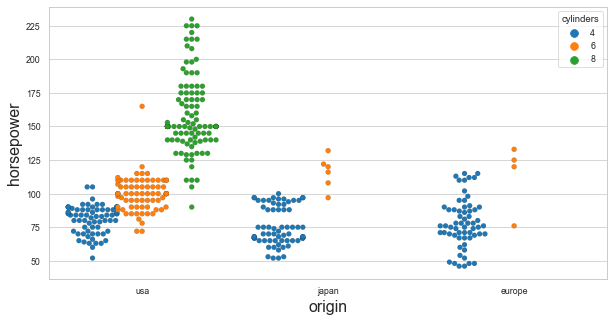

In [66]:
plt.figure(figsize=(10,5))

#sns.stripplot
sns.swarmplot(x=org, y=hp, 
              hue=cyl,
              # orient='h',
              dodge=True,  # split swarms on hue
              # color='white',
              alpha=1,
              size=5,
              linewidth=0.1,  # edge width
              edgecolor='black',  # edge color
              # marker='*',
              );

## Scatterplot

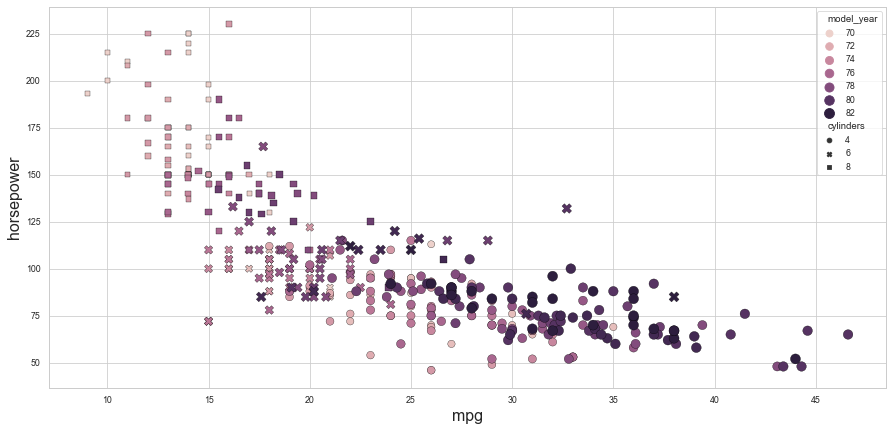

In [67]:
plt.figure(figsize=(15,7))

#sns.stripplot
sns.scatterplot(x=mpg, y=hp, 
                hue=cars.model_year,
                # hue_norm=(0, 7),  # range of hue color
                
                size=cars.model_year,  # size of dots changing with variable
                sizes=(50, 100),  # range of size
                # size_order=,
                s=100,  # size of points if size is not changing with varaible
                
                style=cyl,  # dot style should change with variable
                # markers={} # style markers linked to variable values
                
                alpha=1,
                linewidth=0.3,  # edge width
                edgecolor='black',  # edge color
                
                legend='brief',# 'full',
                
                # zorder=2  # works like z-index from css if plotting two or more graphs 
                )
plt.yticklabels=[]

## Lineplot

In [68]:
flights = sns.load_dataset('flights')

In [69]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


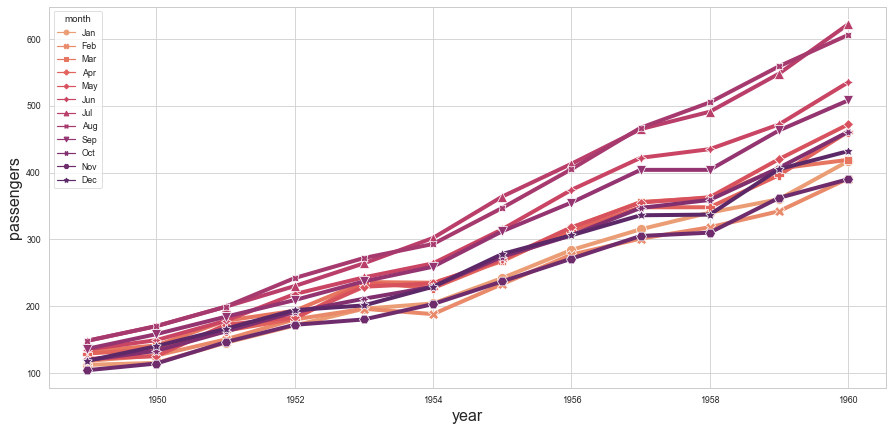

In [70]:
plt.figure(figsize=(15,7))

sns.lineplot(data = flights,
             x='year',
             y='passengers',
                          
             lw=4,  # line width
             # err_style='bars',  # draw confidence interval using bars, or translucent gradient
             # alpha=,
             # color=,
             
             palette='flare' ,
             hue='month',
             
             style='month',
             markers=True,  # different styles marked with markers
             markersize = 10,
             dashes=False,  # different styles marked with line style

             # size='month',
             # sizes=(,),  # size range
             legend="full",

             # estimator= 'sum', # 'std',
             
             # units='subject',
             # estimator=None,
             
             # seaborn uses bootstrapping to calculate confidence interval
             # n_boot= 10_00,  # determine number of bootstrapps
             # ci = 95,  # percentage of bootstrapps to fall in interval
             # ci = None,  # turns off confidence interval
            )
plt.yticklabels=[]

## Regplot

In [71]:
diamonds = sns.load_dataset('diamonds').sample(300, random_state=0)

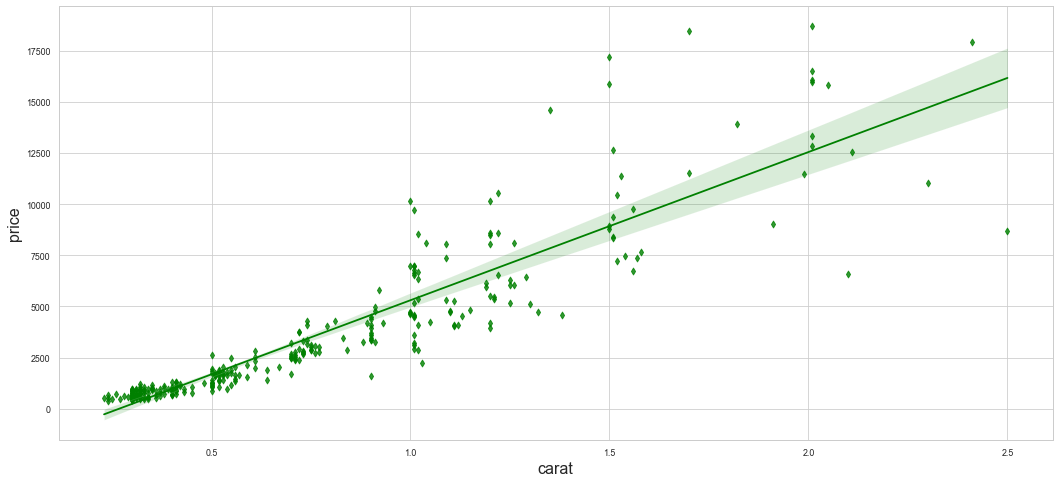

In [72]:
plt.figure(figsize=(15,7))
sns.regplot(data=diamonds,
            x='carat', y='price',
            
            # x_estimator=np.mean,  # funkcja która zostanie użyta na każdej unikatowej wartości x
            # x_jitter=0.1,  # dla discrete variables, noise żeby nie były prosto w jednej linii
            # y_jitter=.03,
              
            # x_bins=10,  # dane są grupowane do 3 bins, regression jest rysowana na oryginalnym położeniu
            truncate=True,  # linia regression jest ograniczana do danych, a nie do axes
            color='green',
            # robust=True,  # robust regression odporna na outliers
            # order=2,  # polynomial regression of this order
            # lowess=True,  # lowess (local) regression
            # logistic=True,  # logistic regression
            # n_boot= 100,  # reduce number of bootstrapps to 100 for logistic regression, recommended by authors 
            
            # logx=True,  # estimate regression for ~ log(x)
            
            
            # fit_reg=False,
            # line_kws={'lw': 4, 'color': 'black', 'linestyle': '-.'},
            # ci=None,  # regression ci
            
            # scatter=False,
            marker='d', #'+',
            # scatter_kws={'s': 100, 'alpha': 0.5, 'color': 'lightgray'},
           )

# plt.xlim(0, 5)
# plt.ylim(0, 12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.tight_layout()

In [73]:
diamonds.clarity.unique()

['SI2', 'SI1', 'VS2', 'IF', 'VVS2', 'VS1', 'I1', 'VVS1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

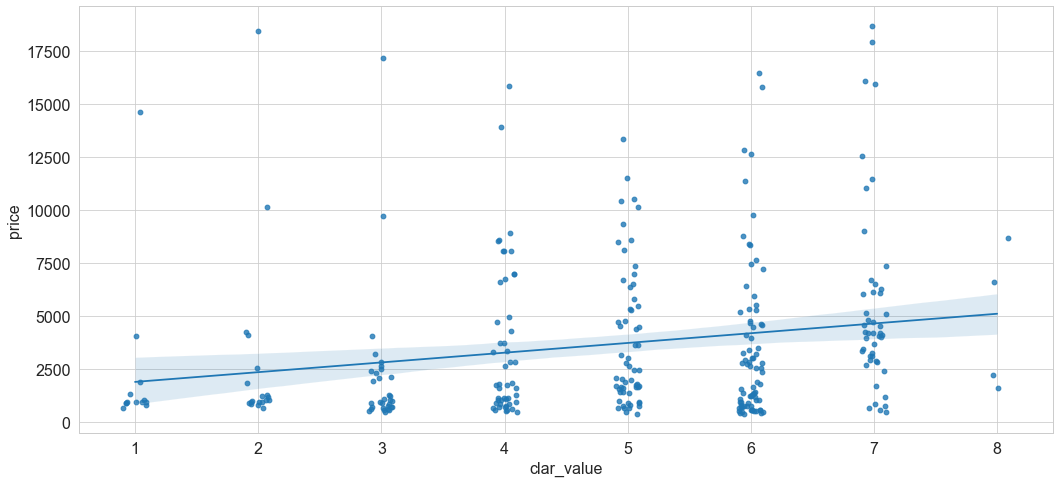

In [74]:
cut_map = {
    'Fair': 5,
    'Good': 4,
    'Very Good': 3,
    'Premium': 2,
    'Ideal': 1,
}

clarity_map = {
    'I1': 8,
    'SI2': 7,
    'SI1': 6,
    'VS2': 5,
    'VS1': 4,
    'VVS2': 3,
    'VVS1': 2,
    'IF': 1,
}

diamonds['cut_value'] = diamonds.cut.map(cut_map)
diamonds['cut_value'] = diamonds['cut_value'].cat.as_ordered().astype('int')
diamonds['clar_value'] = diamonds.clarity.map(clarity_map)
diamonds['clar_value'] = diamonds['clar_value'].cat.as_ordered().astype('int')

plt.figure(figsize=(15,7))
sns.regplot(data=diamonds,
            # x='cut_value',
            x='clar_value', 
            y='price', 

            x_jitter=0.1,
            y_jitter=0.1,
            # robust=True,
            # x_estimator=np.mean,
           )
plt.yticklabels=[]
plt.tight_layout()
# there is crealry something wrong with this distribution, ideal diamonds are cheaper than fair

In [75]:
penguins = sns.load_dataset('penguins')
penguins['is_male'] = penguins.sex == 'Male'
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   is_male            344 non-null    bool   
dtypes: bool(1), float64(4), object(3)
memory usage: 19.3+ KB


<AxesSubplot:xlabel='body_mass_g', ylabel='is_male'>

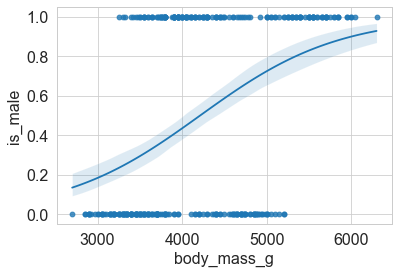

In [76]:
sns.regplot(data=penguins,
            x='body_mass_g',
            y='is_male',
            logistic=True,
            n_boot= 100,  # reduce number of bootstrapps for logistic regression
           )

## Heatmap & Clustermap (Coorelations)

In [77]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    385 non-null    float64
 4   weight        391 non-null    int64  
 5   acceleration  391 non-null    float64
 6   model_year    391 non-null    int64  
 7   origin        391 non-null    object 
 8   name          391 non-null    object 
 9   newer         391 non-null    bool   
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 30.9+ KB


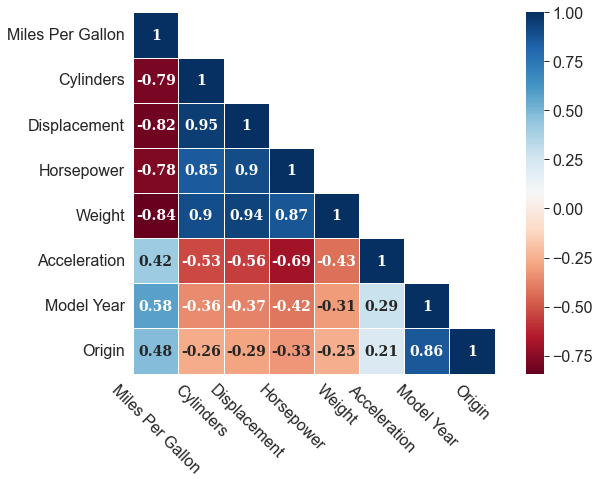

In [78]:
labels = ['Miles Per Gallon', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year',
          'Origin']

corr = cars.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False


plt.figure(figsize=(10, 7))
sns.heatmap(data=corr, # orders.T
            cmap='RdBu', #'YlOrBr',# 'Blues',
            
            # center=0,  # can be also centered on a specific cell value if we extract it
            # vmin=-1,
            # vmax=1,
            
            xticklabels=labels, # False
            yticklabels=labels, # False
            
            annot=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'fontfamily': 'serif'},
            # fmt='.00f',  # round annotations
            
            square=True,  # always be squares
            linewidth=1,
            linecolor='white', # 'lightgray',  # mask doesn't hide it
            
            # cbar_kws={"orientation": "horizontal"},
            
            mask=mask
           )

# to show params on top, doesn't work with mask
# plt.tick_params(
#     which='both',      
#     bottom=False,      
#     left=False,      
#     labelbottom=False,
#     labeltop=True) 

plt.xticks(rotation=-45)
plt.yticklabels=[]
plt.tight_layout()

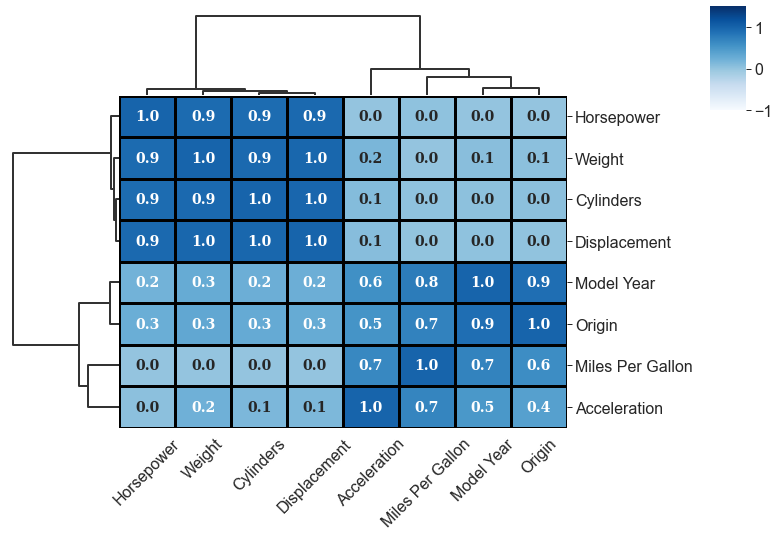

In [79]:
p = sns.clustermap(corr,
               figsize=(10, 8),
               cmap='Blues',
               
               annot=True,
               annot_kws={'fontsize':14, 'fontweight': 'bold', 'fontfamily': 'serif'},
               fmt='.1f',
               
               vmax=1.5,
               # center=0.5,
               vmin=-1,
               
               standard_scale=1,  # 1 standardization for columns, 0 for rows 
               # z_score=1,  # 1 z_score for columns, 0 for rows 
               # metric='correlation', #'cityblock',  # (cityblock == manhattan distance)
               # method='single', #
               
               # row_cluster=False,
               # col_cluster=False,
               
               # row_colors=, # colors samples, can show distribution
               # col_colors=, # colors columns, can show distribution
               
               cbar_pos=(1, 0.8, 0.05, 0.18), #None, #(0,.4,.05,.35),
               xticklabels=labels, 
               yticklabels=labels,

               lw=3,
               linecolor='black',
               tree_kws={'lw': 2},
              )

# plt.yticks(rotation=-65)  # rotates ticks on cbar, not on heat map
plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)  # rotates ticks on heatmap
plt.yticklabels=[]

In [80]:
iris = sns.load_dataset('iris')

In [81]:
color

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [82]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [83]:
# iris.nunique()
species_colors = dict(zip(iris.species.unique(), (color[1], color[3], color[11])))
sample_colors = iris.species.map(species_colors)

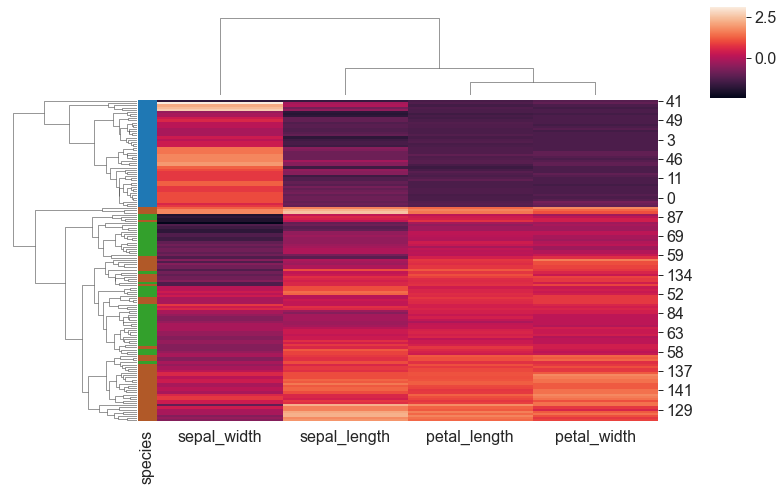

In [84]:
p = sns.clustermap(iris.drop('species', axis=1),
               figsize=(10, 7),
               z_score=1,  # 1 z_score for columns, 0 for rows 

               row_colors=sample_colors, # colors samples, can show distribution
               # col_colors=, # colors columns, can show distribution
               
               cbar_pos=(1, 0.8, 0.05, 0.18), #None, #(0,.4,.05,.35),
              )

# plt.yticks(rotation=-65)  # rotates ticks on cbar, not on heat map
plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), rotation=0)  # rotates ticks on heatmap
plt.yticklabels=[]


## Barplot & Countplot

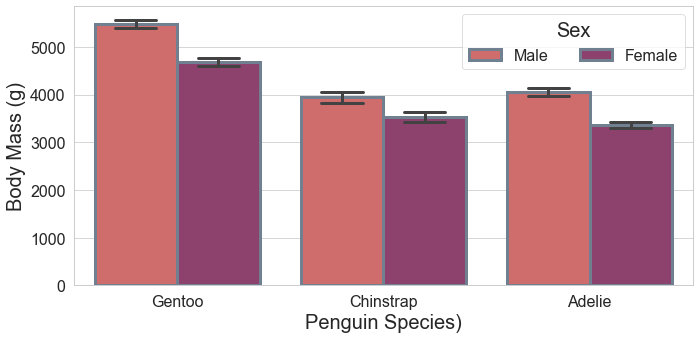

In [85]:
plt.figure(figsize=(10, 5))

p = sns.barplot(data=penguins,
            x='species', y='body_mass_g',
            # x='body_mass_g', y='species',
            # estimator=np.std, # np.max,
            hue='sex',
            
            # ci=None, #68,
            errwidth=3,
            capsize=0.2,
            
            palette='flare',
            edgecolor='slategray',
            lw=3,
            
            # dodge=False,
            
            order=['Gentoo', 'Chinstrap', 'Adelie'],
            hue_order=['Male', 'Female'],
           )


plt.ylabel('Body Mass (g)', fontsize=20)
plt.xlabel('Penguin Species)', fontsize=20)
plt.yticks(rotation=0)
plt.xticks(fontsize=16)
p.legend(title='Sex', title_fontsize='20', fontsize='16', loc='upper right', ncol=2,) #bbox_to_anchor= (1, 1.2))
plt.tight_layout()
plt.yticklabels = []

Stacked barplot can be accomplished using pandas

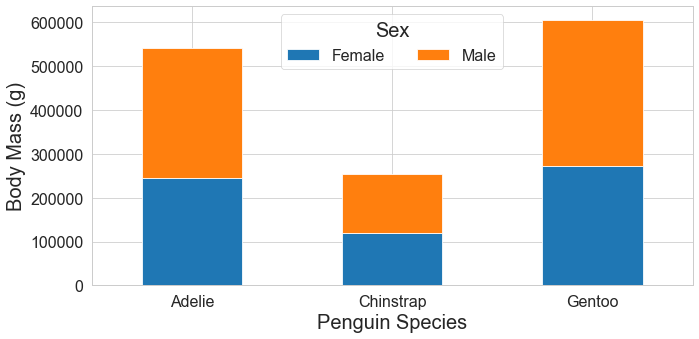

In [86]:
p = (penguins.groupby(['species', 'sex']).body_mass_g.sum().unstack()
).plot(kind='bar', stacked=True, width=0.5, figsize=(10, 5))

plt.ylabel('Body Mass (g)', fontsize=20)
plt.xlabel('Penguin Species', fontsize=20)
plt.xticks(rotation=0)
plt.xticks(fontsize=16)
p.legend(title='Sex', title_fontsize='20', fontsize='16', loc='upper center', ncol=2,)
plt.yticklabels = []
plt.tight_layout()

Countplot

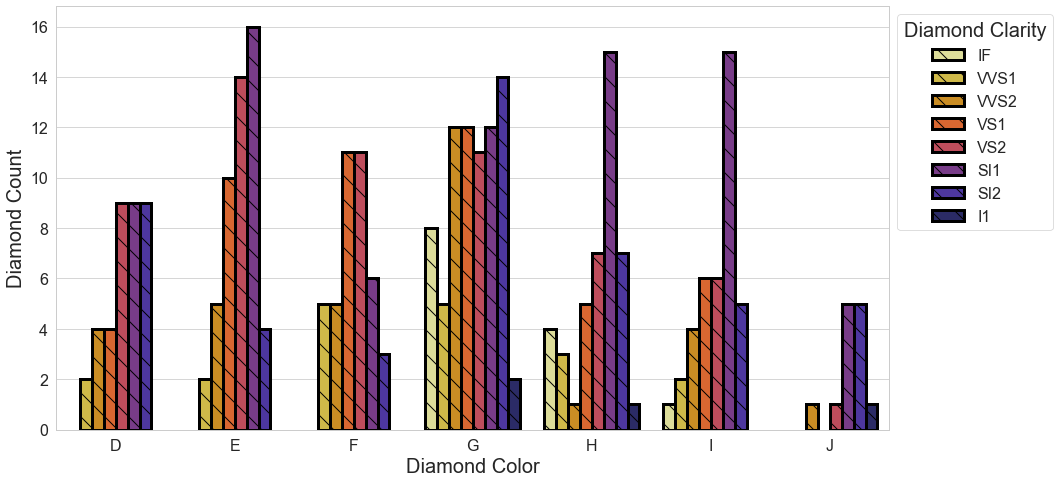

In [87]:
plt.figure(figsize=(15, 7))

p = sns.countplot(data=diamonds,
              # y='color',
              x='color',
              hue='clarity', 
              
              # order=diamonds.color.value_counts(), # [::-1], for descending
              # hue_order=['SI1', 'VS2'],
              
              palette='CMRmap_r', #'BuPu', #'twilight_r', #'Accent',
              # facecolor=(0, 0, 0, 0),
              linewidth=3, 
              edgecolor='black',
              hatch='\\', # '/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'
             )

plt.ylabel('Diamond Count', fontsize=20)
plt.xlabel('Diamond Color', fontsize=20)
plt.xticks(fontsize=16)
p.legend(title='Diamond Clarity', title_fontsize='20', fontsize='16', ncol=1,bbox_to_anchor= (1, 1)) # loc='upper right' 
plt.tight_layout()
plt.yticklabels = []

## Pairplot & Pairgrid

Pairplot is built on pairgrid.

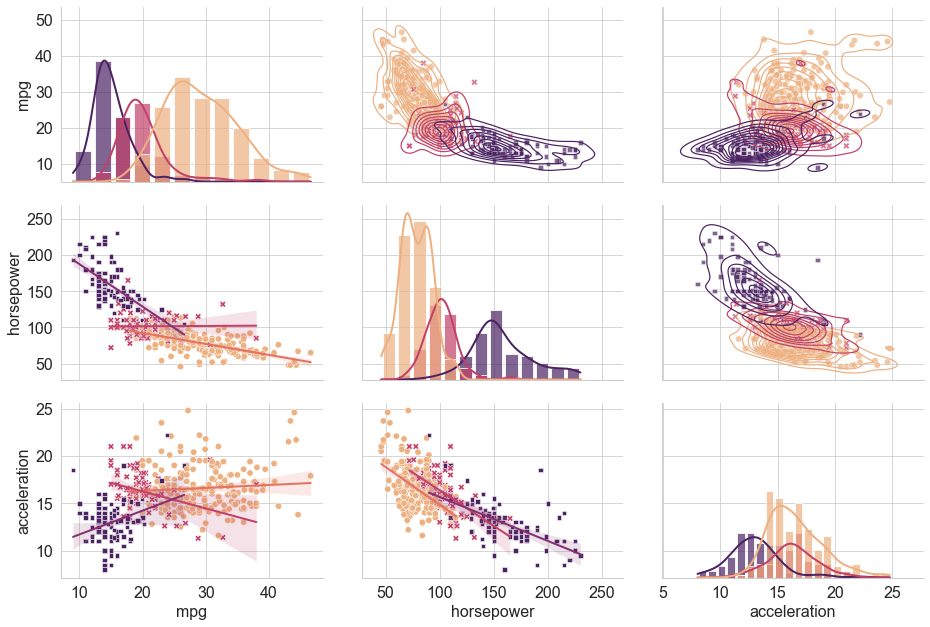

In [88]:
p = sns.PairGrid(cars,
                 vars=['mpg', 'horsepower', 'acceleration'],  
                 # y_vars=['tip'],
                 # x_vars=['total_bill', 'size'],
                 
                 dropna=False,  # drop missing values before plotting
                 
                 hue='cylinders',
                 hue_order=None,
                 corner=False,  # hide upper right traingle
                 
                 aspect=1.5, height=3, # width to height ratio limiter
                 palette='flare',
                )

# adding plots
# p.map()
# p.map_offdiag()

p.map_diag(sns.histplot, alpha=0.7, shrink=0.8, kde=True, 
           line_kws=dict(linewidth=2), 
           kde_kws=dict(bw_adjust=1))

p.map_upper(sns.scatterplot, style=cars['cylinders'], s=40, alpha=0.7)
p.map_upper(sns.kdeplot, levels=10)

p.map_lower(sns.scatterplot, style=cars['cylinders'], s=40)
p.map_lower(sns.regplot, order=1, scatter=False,
            line_kws=dict(linewidth=2))

plt.yticklabels = []

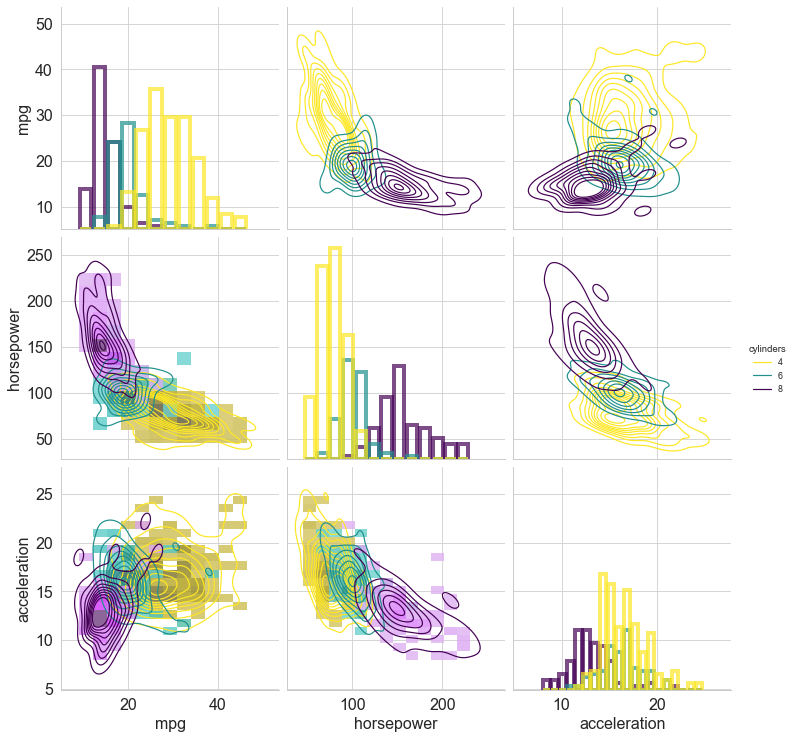

In [89]:
p = sns.pairplot(cars,
                 vars=['mpg', 'horsepower', 'acceleration'],  # even though groub using cylinders, we hide them as columns
                 # y_vars=['tip'],
                 # x_vars=['total_bill', 'size'],
                 dropna=False,  # drop missing values before plotting
                 
                 hue='cylinders', 
                 corner=False,  # hide upper right traingle
                 
                 kind='kde', # 'scatter', 'kde', 'hist', 'reg',
                 diag_kind='hist',  # 'hist', 'kde',
                 
                 height=3.5,
                 palette='viridis_r',
                 
                 # We can access plots keywords, and nested keywords in these plot keywords
                 diag_kws=dict(fill=False, linewidth=4, shrink=.8, alpha=0.7)
                 # plot_kws=dict(),
                 # grid_kws = {},  # pairgrid constructor
                )

# returned value p is pairgrid, and other grids can be added using it
p.map_lower(sns.histplot, alpha=0.8)
plt.yticklabels = []


## Jointplot & JointGrid

Jointplot is built on joingrid

In [90]:
geyser = sns.load_dataset('geyser')

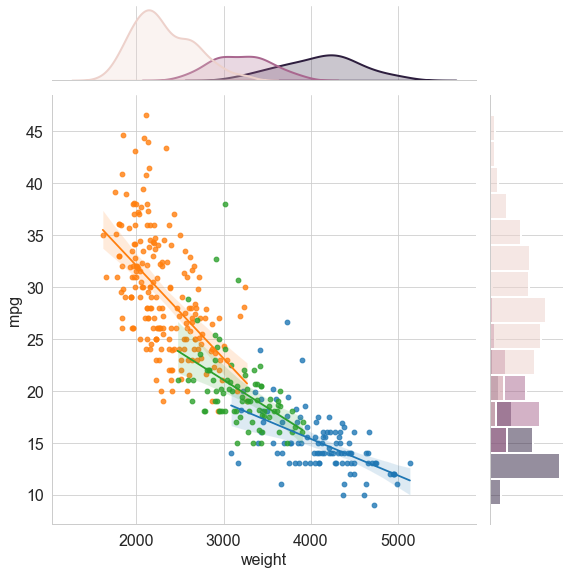

In [91]:
x, y, hue =  cars.weight, cars.mpg, cars.cylinders
p = sns.JointGrid(height=8)

for i, value in enumerate(cars.cylinders.unique()):
    sns.regplot(ax=p.ax_joint,
                data=cars[cars.cylinders==value],
                x='weight',
                y='mpg',
                ci=99,
               )

sns.kdeplot(ax=p.ax_marg_x, x=x, hue=hue, fill=True, color='xkcd:indigo', lw=2, legend=False)
sns.histplot(ax=p.ax_marg_y, y=y, hue=hue, bins=15, lw=2, color='xkcd:indigo', alpha=0.5, legend=False)

plt.setyticklables=[]

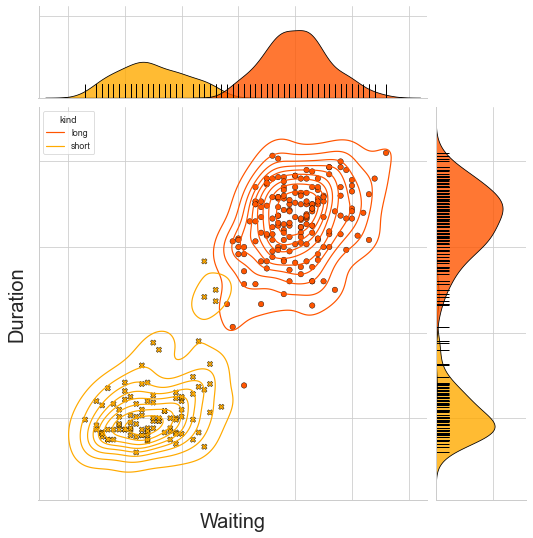

In [92]:
p = sns.jointplot(x='waiting', y='duration', data=geyser,
                  hue='kind',
                  # kind='hex',  #'scatter', 'hist', 'hex', 'kde', 'reg', 'resid',
                  marginal_ticks=True,
                  height=8,
                  ratio=4,  # joint to marginals size ratio
                  space=0.1,  # space between joint (middle) and marginals plots
                    
                  joint_kws=dict(s=30,
                                 style=geyser['kind'],
                                 edgecolor='black',
                                 linewidth=0.4,
                                 alpha=1),
                  
                  marginal_kws=dict(alpha=0.8, edgecolor='black'),
                  
                  palette='autumn',
                  color='#643db8',
                 )

# adding additional plots
p.plot_marginals(sns.rugplot, height=.15, palette=('black','black'))
p.plot_joint(sns.kdeplot, levels=10)

p.ax_joint.set_xlabel('Waiting', fontsize=20)
p.ax_joint.set_ylabel('Duration', fontsize=20)

for ax in (p.ax_marg_y, p.ax_marg_x):
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## FacetGrid

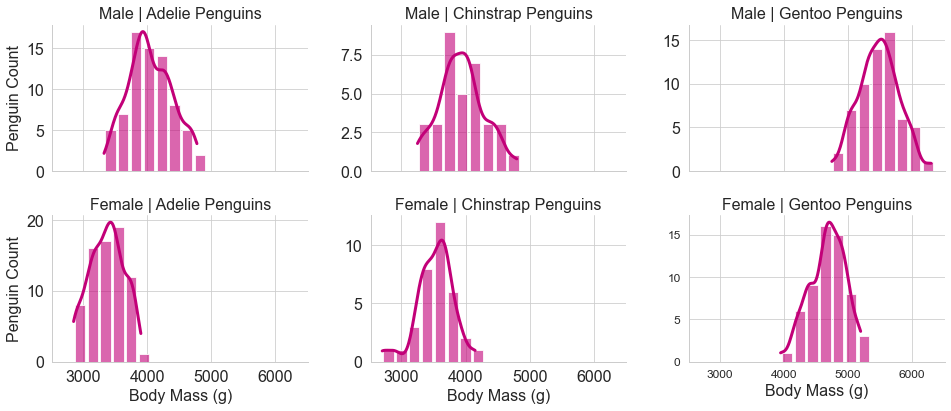

In [94]:
p = sns.FacetGrid(penguins,
                  row='sex',
                  col='species',
                  # hue='island',
                  aspect=1.5,  # width to height aspect
                  
                  sharey=False,  # plots have the same y axis
                  # sharex=False,  # plots have the same x axis
                  
                  # ylim=(),
                  # xlm=(),
                 )

p.map_dataframe(sns.histplot, x='body_mass_g', binwidth=200, alpha=0.6, shrink=.8, color='xkcd:magenta',
                kde=True, line_kws=dict(linewidth=3), kde_kws=dict(bw_adjust=0.7))

p.set_axis_labels('Body Mass (g)', 'Penguin Count')


# p.map_dataframe(sns.regplot, x='bill_length_mm', y='bill_depth_mm

# p.add_legend(title='Species Body Parts Size Distribution', title_fontsize='20', fontsize='16', ncol=3, bbox_to_anchor= (0.5, 1.1))
# p.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')


p.set_titles(row_template='{row_name}', col_template='{col_name} Penguins')
plt.xticks(fontsize=12)  # why it works only for bottom right one? 
plt.yticks(fontsize=12)  # why it doesn't work?
plt.yticklables=[]

Using custom function

In [95]:
def add_mean_line(data, var=None, **kws):
    if not var: return
    
    # calculate mean for each group
    m = np.mean(data[var])
    # get axis
    ax = plt.gca()
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

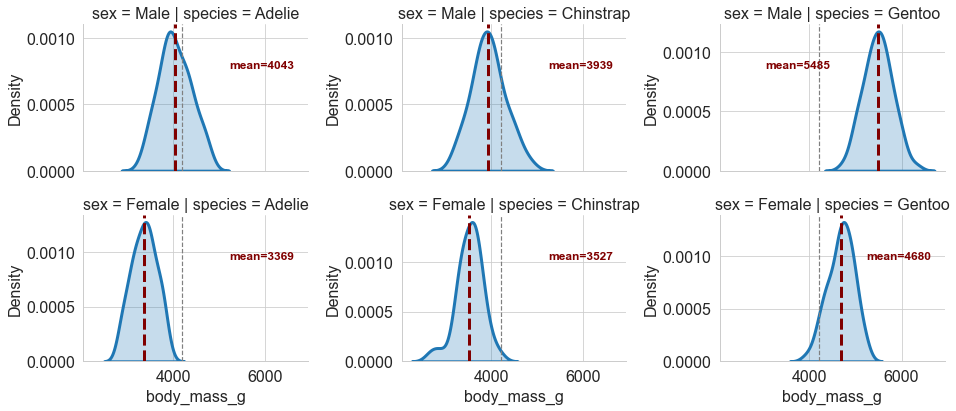

In [96]:
p = sns.FacetGrid(penguins,
                  row='sex',
                  col='species',
                  aspect=1.5,
                  sharey=False)

p.map_dataframe(sns.kdeplot, x='body_mass_g', lw=3, shade=True)
p.map_dataframe(add_mean_line, var='body_mass_g')
p.refline(x=penguins['body_mass_g'].mean())


plt.tight_layout()

## Catplot

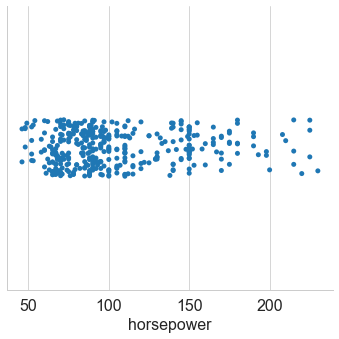

In [97]:
sns.catplot(data=cars, 
            x='horsepower')

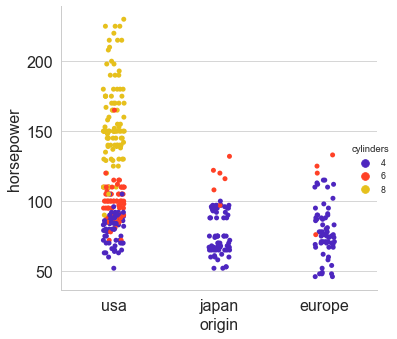

In [98]:
sns.catplot(data=cars, 
            y='horsepower',
            x='origin',
            hue='cylinders',
            kind='strip',
            palette='CMRmap',
           )
plt.tight_layout()

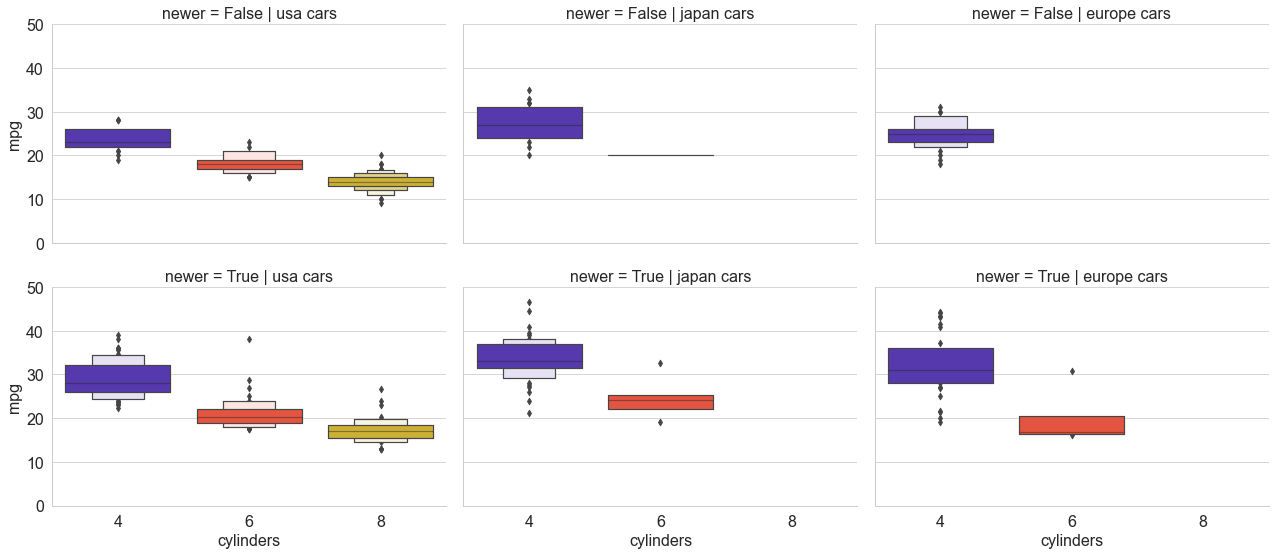

In [99]:
p = sns.catplot(data=cars,
                x='cylinders', y='mpg', 
                col='origin',
                # col_wrap=3,
                row='newer',
                # hue=,
                
                # sharex=,
                # sharey=,
                
                kind='boxen', # 'box', #'count', 'violin', 'strip', 'swarm', 'boxen', 'point', 'bar', 'count'
                # here we also put arguments specific to given plot kind
                
                aspect=1.5,
                height=4,
                facet_kws={'ylim':(0, 50)},
                palette='CMRmap',
                
                legend=True,
                legend_out=True,
               )

p.set_titles(col_template="{col_name} cars")
plt.tight_layout()

## Relplot

In [100]:
titanic = sns.load_dataset('titanic')
titanic['decade'] = [age//10*10 for age in titanic.age]

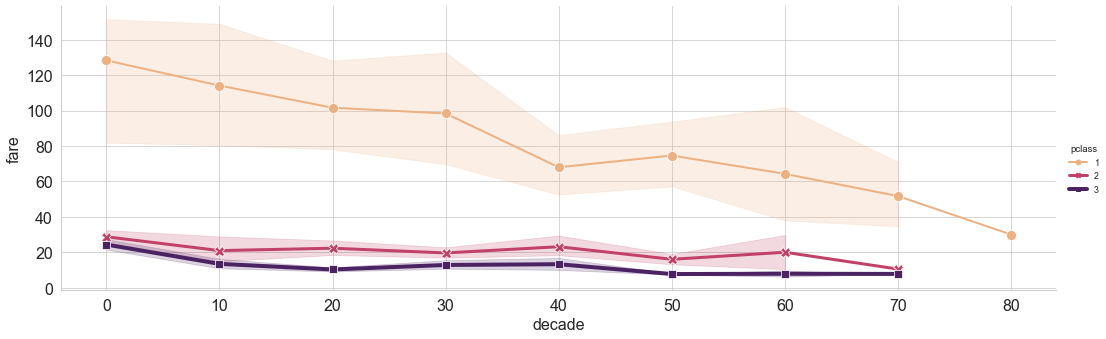

In [101]:
p = sns.relplot(data=titanic, 
                y='fare', x='decade',
                
                hue='pclass',
                style='pclass',
                size='pclass',
                sizes=(2, 4),
                # col='pclass',
                # col_wrap=3,
                # row='pclass',
            
                height=5,
                aspect=3,
                palette='flare',
                
                kind='line',
                # kind specific arguments
                markers=True,
                markersize = 10,
                dashes=False,
                # ci=None,
               )
plt.yticklables=[]

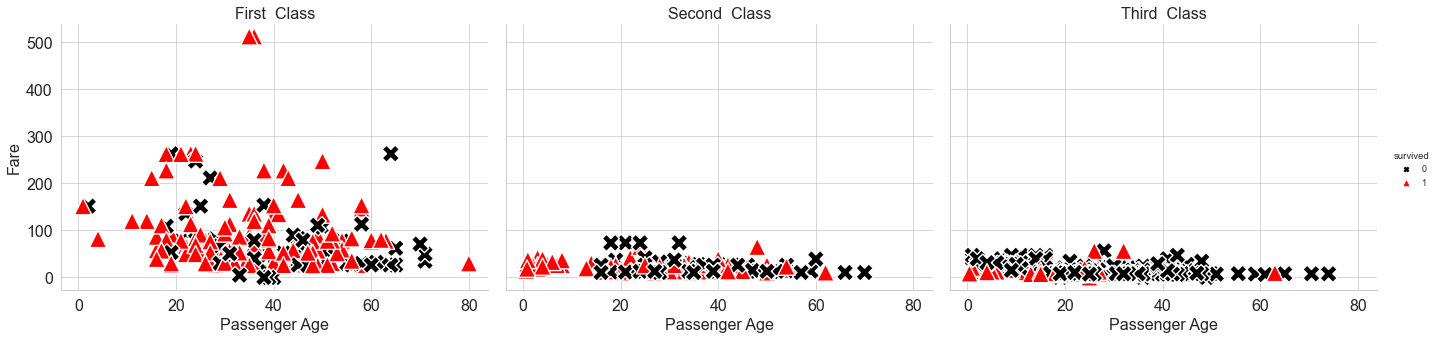

In [102]:
p = sns.relplot(x='age', y='fare', data=titanic,
                col='class',                
                hue='survived',
                aspect=1.3,
                s=300,
                palette=['black', 'red'],
                style='survived',
                markers=['X', '^'],
               )

p.set_titles(col_template='{col_name}  Class')
p.set_xlabels('Passenger Age')
p.set_ylabels('Fare')
plt.yticklables=[]

## Displot

<Figure size 1080x504 with 0 Axes>

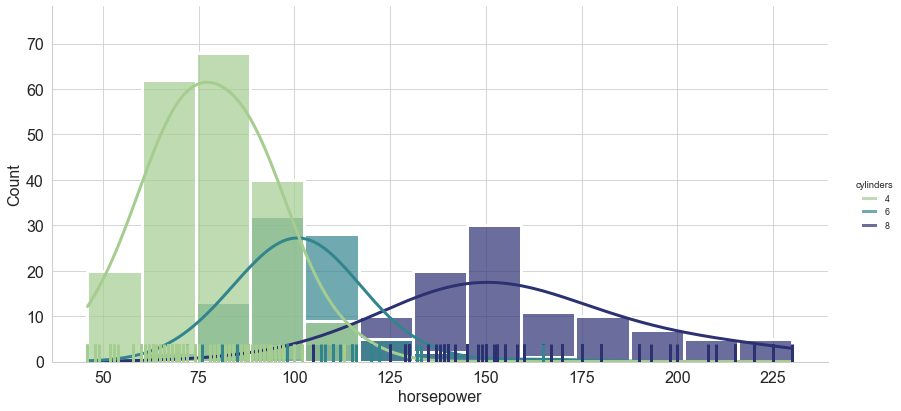

In [103]:
plt.figure(figsize=(15,7))
p = sns.displot(data=cars,
                x='horsepower', 
                # y='horsepower',
                hue='cylinders',
                
                # col=,
                # col_wrap=,
                # row=,
                aspect=2,
                height=6,
                
                kind='hist', # 'hist', 'ecdf', 'kde',
                # kind specific keywords
                kde=True,
                kde_kws=dict(bw_adjust=2),
                line_kws=dict(linewidth=3),
                fill=True,
                lw=3,
                alpha=0.7,
                
                rug=True,
                rug_kws=dict(height=0.05, lw=3),
                palette='crest',
               )

## Lmplot 

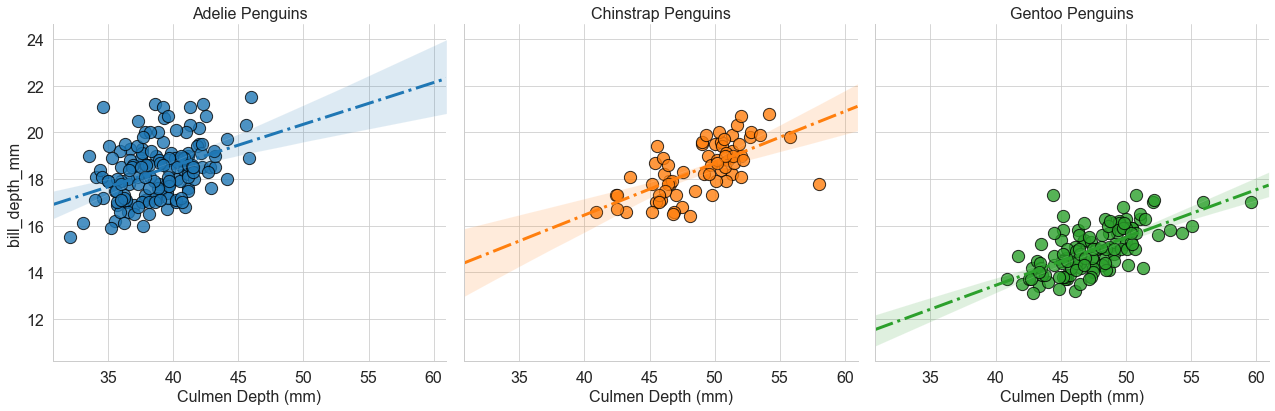

In [105]:
p = sns.lmplot(data=penguins,
               x='bill_length_mm',
               y='bill_depth_mm',
               hue='species',
               col='species',
               # row='sex',
               # x_bins=5,
                           
               n_boot=100,
               truncate=False,
               
               # logistic=True,
               
               # markers=['o', 'x', 'd'],
               
               scatter_kws={'s': 150, 'edgecolor': 'black'},
               line_kws={'linewidth': 3, 'linestyle': '-.'},
               height=6,
               aspect=1,
              )

p.set_titles(col_template='{col_name} Penguins')
p.set_xlabels('Culmen Depth (mm)')
plt.tight_layout()

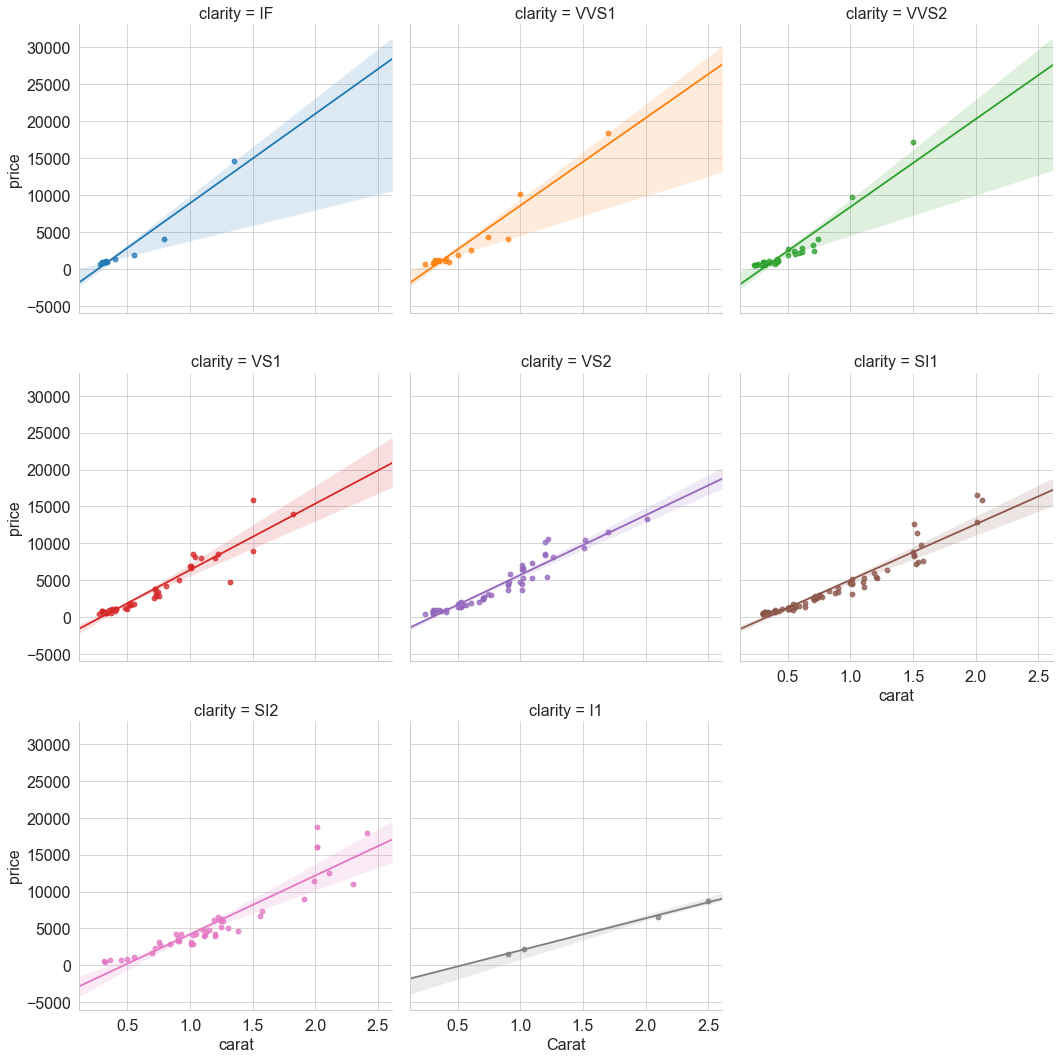

In [106]:
p = sns.lmplot(data=diamonds,
               x='carat',
               y='price',
               col='clarity',
               col_wrap=3,
               hue='clarity',
               truncate=False,
              )

plt.xlabel('Carat')
plt.ylabel('Price')
plt.tight_layout()

## 